# Unidad 9 - Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Septiembre 2024.

# PySerial: análisis espectral
Supongamos que quiero mezclar lo que aprendimos en la unidad 8 (análisis y  filtrado de señales) con la nueva adquisición de la unidad 9.<br>
La idea es levantar una señal de la vida real con un micrófono (MAX9814 es el nombre del sensor en cuestión), y hacer el análisis y filtrado correspondiente.<br>
Ojalá podamos obtener la señal original filtrada.

In [1]:
import serial #para leer la data del arduino uno
import serial.tools.list_ports as lp
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
### para ver en que puerto tengo el sensor en cuestión
ports = list(lp.comports())

for p in ports:
    print(p)

/dev/cu.debug-console - n/a
/dev/cu.WH-CH510 - n/a
/dev/cu.Bluetooth-Incoming-Port - n/a
/dev/cu.usbmodem11401 - IOUSBHostDevice


In [107]:
#declaro dos variables, el puerto donde esta conectada la placa y el BAUD

puerto_arduino = '/dev/cu.usbmodem11401' #el puerto 
baud = 115200 #velocidad de comunicación entre la compu y el arduino
try:
    arduino = serial.Serial(port=puerto_arduino, baudrate=baud)  
    print(f'Conectado exitosamente al puerto: {puerto_arduino} BAUD rate: {baud}')
except:
    print(f'No se pudo conectar al puerto: {puerto_arduino} BAUD rate: {baud}')

Conectado exitosamente al puerto: /dev/cu.usbmodem11401 BAUD rate: 115200


In [111]:
#inicializamos el array
def save_sensor_data():
    data = arduino.readline().decode('utf-8').strip()
    print(f"Data {time.strftime('%H:%M:%S')}: {data}")
    return data 

datos = np.array([])

t_end = time.time() + 10  #supongamos que quiero que corra mi script durante 5 segundos.

while time.time() < t_end:
    data = save_sensor_data()
    datos = np.append(datos, int(data))

Data 11:35:38: 290
Data 11:35:38: 287
Data 11:35:38: 237
Data 11:35:38: 235
Data 11:35:38: 218
Data 11:35:38: 234
Data 11:35:38: 283
Data 11:35:38: 230
Data 11:35:38: 221
Data 11:35:38: 256
Data 11:35:38: 239
Data 11:35:38: 279
Data 11:35:38: 283
Data 11:35:38: 248
Data 11:35:38: 282
Data 11:35:38: 217
Data 11:35:38: 239
Data 11:35:38: 210
Data 11:35:38: 270
Data 11:35:38: 248
Data 11:35:38: 297
Data 11:35:38: 248
Data 11:35:38: 251
Data 11:35:38: 211
Data 11:35:38: 276
Data 11:35:38: 243
Data 11:35:38: 250
Data 11:35:38: 242
Data 11:35:38: 300
Data 11:35:38: 274
Data 11:35:38: 221
Data 11:35:38: 242
Data 11:35:38: 280
Data 11:35:38: 232
Data 11:35:38: 236
Data 11:35:38: 292
Data 11:35:38: 276
Data 11:35:38: 242
Data 11:35:38: 247
Data 11:35:38: 302
Data 11:35:38: 301
Data 11:35:38: 225
Data 11:35:38: 230
Data 11:35:38: 281
Data 11:35:38: 233
Data 11:35:38: 270
Data 11:35:38: 269
Data 11:35:38: 267
Data 11:35:38: 289
Data 11:35:38: 278
Data 11:35:38: 217
Data 11:35:38: 271
Data 11:35:3

In [112]:
len(datos)

369

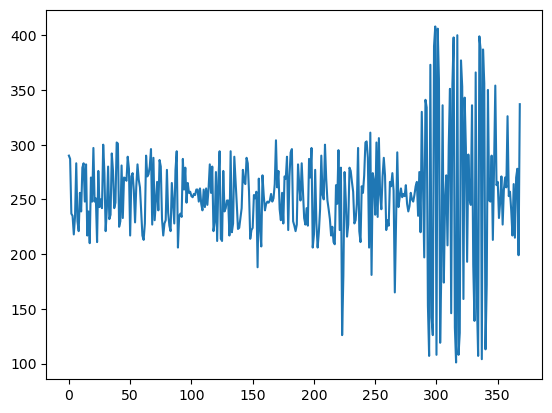

In [113]:
plt.plot(datos)

In [105]:
arduino.close()

Le indicamos al arduino en el código que nuestra frecuncia de muestreo es 8000Hz, cosa de poder levantar bien las frecuencias de la voz humana, lo que equivale a 0.125 entre muestra y muestra

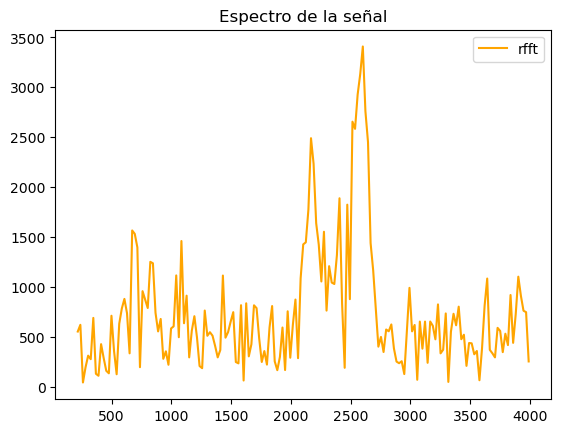

In [114]:
periodo = 1/8000 #Hz

datos_fft = np.fft.rfft(datos)

rfrec=np.fft.rfftfreq(datos.size, d = periodo)

plt.title('Espectro de la señal')
plt.plot(rfrec[10:], np.abs(datos_fft[10:]), color ='orange', label = 'rfft')
plt.legend()
plt.show()